<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/XOR_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

# inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
# expected_output = np.array([[0],[1],[1],[0]])

inputs = np.array([[0,0,0],
                   [0,0,1],
                   [0,1,0],
                   [0,1,1],
                   [1,0,0],
                   [1,0,1],
                   [1,1,0],
                   [1,1,1]
                   ])
expected_output = np.array([[0],[1],[1],[0],[1],[0],[0],[1]])

Train and Test are the same in this exercise 

In [0]:
import matplotlib.pyplot as plt

def plot_epoch(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

def create_model(inputs, nEpoch):
  input_dimension = inputs.shape[1]
  model = Sequential()
  model.add(Dense(2, input_dim=input_dimension))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(1,  activation='sigmoid'))

  model.compile(
    #optimizer='adam',
    optimizer=SGD(lr=0.1),
    # loss='categorical_crossentropy',
    loss='binary_crossentropy',
    metrics=['accuracy'],
  )

  #model.summary()
  model.evaluate(inputs,expected_output)
  return model, model.fit(inputs, expected_output, batch_size=1, verbose=0, epochs=nEpoch)

8/8 [==============================] - 1s 126ms/step


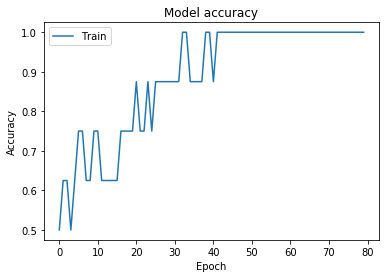

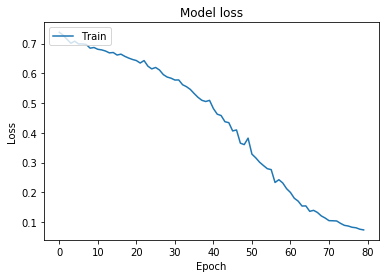

array([[0.16002613],
       [0.9509473 ],
       [0.977706  ],
       [0.03650507],
       [0.97981817],
       [0.04723781],
       [0.17105663],
       [0.9497918 ]], dtype=float32)

In [153]:
model, history = create_model(inputs, 80)
plot_epoch(history)

# Predic inputs
predictions = model.predict(inputs)

predictions

In [154]:
if( (np.round(predictions)==expected_output).all() ):
  print('Memorized')
else:
  print(np.round(predictions))
  print(expected_output)

# Print our model's predictions.
# print(np.argmin(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
#print(inputs[:5]) # [7, 2, 1, 0, 4]

Memorized
